# Supervised Learning on Exams Dataset

## Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
df.rename(columns = {'test preparation course':'test_preparation_course', 'math score':'math_score','reading score':'reading_score','writing score':'writing_score'}, inplace = True)

In [4]:
df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
fig1 = px.pie(df, values = df["gender"].value_counts().values, names = df['gender'].value_counts().index, title = 'Gender Distribution')
fig1.show()

Male and Female students seem to be pretty equally distributed

In [5]:
fig2 = px.pie(df, values = df['test_preparation_course'].value_counts().values, names = df['test_preparation_course'].value_counts().index, title = 'Test preparation')
fig2.show()

Only about a third of people did test preparation

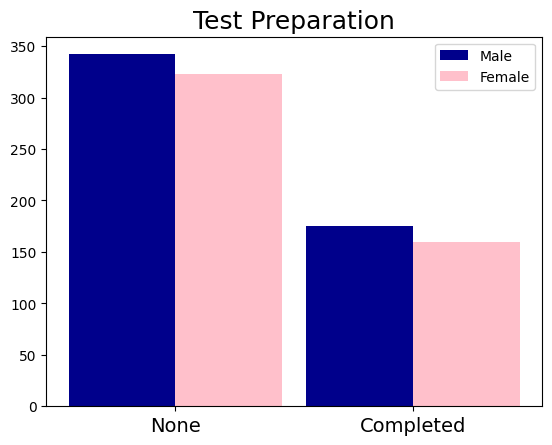

In [6]:
fig3, ax = plt.subplots()
x_axis_status = df['test_preparation_course'].value_counts().index
x_axis_sex = df['gender'].value_counts().index
male_stats = df[df['gender'] == 'male']['test_preparation_course'].value_counts().values
female_stats = df[df['gender'] == 'female']['test_preparation_course'].value_counts().values
ind = np.arange(2)
width = 0.45

ax.set_title('Test Preparation', fontsize = 18)  
ax.bar(ind, male_stats , width, label='Male', color = 'darkblue')
ax.bar(ind + width, female_stats, width, label='Female', color = 'pink')
plt.sca(ax)
plt.xticks(ind + width / 2, ('None', 'Completed'), fontsize = 14)

ax.legend()


plt.grid
plt.show()

The test preparation is pretty equally distributed between the genders as well since there are more males than females in this dataset

C:\Users\onnin\AppData\Local\Temp\ipykernel_1480\86085690.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



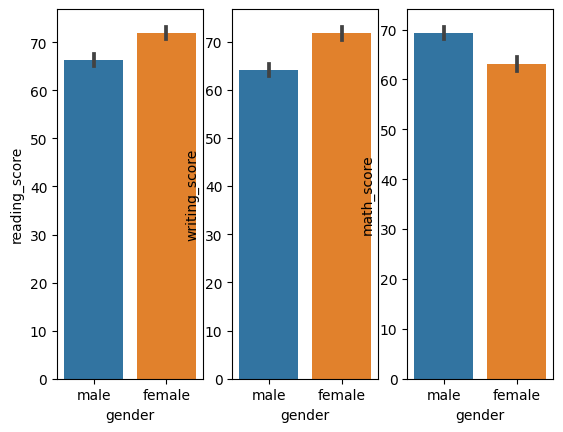

In [7]:
fig4, ax = plt.subplots(1,3)
sns.barplot(x = df['gender'], y = df['reading_score'], ax = ax[0])
sns.barplot(x = df['gender'], y = df['writing_score'], ax = ax[1])
sns.barplot(x = df['gender'], y = df['math_score'], ax = ax[2])
fig4.show()

From this plot we can conclude that females performed better than males on everything except maths.

## Data preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['race/ethnicity']=le.fit_transform(df['race/ethnicity'])
df['parental level of education']=le.fit_transform(df['parental level of education'])
df['lunch']=le.fit_transform(df['lunch'])
df['test_preparation_course']=le.fit_transform(df['test_preparation_course'])


In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68


In [10]:
df['total_scores'] = df['math_score'] + df['reading_score'] + df['writing_score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores
0,1,0,2,1,0,67,67,63,197
1,0,3,5,0,1,40,59,55,154
2,1,4,4,0,1,59,60,50,169
3,1,1,2,1,1,77,78,68,223
4,1,4,0,1,0,78,73,68,219


splitting columns into independent and dependent variables

In [11]:
X = df[['gender','race/ethnicity','parental level of education','lunch','test_preparation_course','math_score','reading_score','writing_score']]
y = df[['total_scores']]

In [129]:
X

,test_preparation_course,math_score,reading_score,writing_score,total_scores
0,0,67,67,63,197
1,1,40,59,55,154
2,1,59,60,50,169
3,1,77,78,68,223
4,0,78,73,68,219
...,...,...,...,...,...
995,1,73,70,65,208
996,0,85,91,92,268
997,1,32,35,41,108
998,1,73,74,82,229


## Testing + Training Model

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [13]:
from sklearn.neighbors import KNeighborsRegressor
k = 15
knn = KNeighborsRegressor(n_neighbors = k)
knn.metric

'minkowski'

In [14]:
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.9975352263052262

Running algorithm with different test/train portions (80/20)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
k = 10
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.9972899513150922

## Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
k_range = range(1,40)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors= k)
    scores = cross_val_score(knn, X, y,  cv = 5, scoring= 'r2')
    k_scores.append(scores.mean())

In [18]:
k_scores

[0.9960060468811657,
 0.9971621018047534,
 0.9976763068666953,
 0.9978397433074189,
 0.9979920607236851,
 0.9980625417343187,
 0.9980648863706427,
 0.9980614820999995,
 0.998046309958346,
 0.9980532623244047,
 0.9979203615930908,
 0.9978435584901536,
 0.9977105058167384,
 0.9975379238029797,
 0.9974546477161139,
 0.9972753643779673,
 0.9971508214397913,
 0.9970331916744437,
 0.9968672648277052,
 0.9967070885078175,
 0.9965583196826122,
 0.9964186310318179,
 0.996297553675815,
 0.9961653273971072,
 0.9960213294155388,
 0.9958652666520538,
 0.9957049728699481,
 0.9956011455310453,
 0.9954865037376905,
 0.9952929924005984,
 0.9950678849163662,
 0.9948486009992885,
 0.9946306192360133,
 0.9944391347110688,
 0.9942801400746628,
 0.9940105229790588,
 0.9937490802443902,
 0.9935644722033745,
 0.9933007361196772]

<AxesSubplot:>

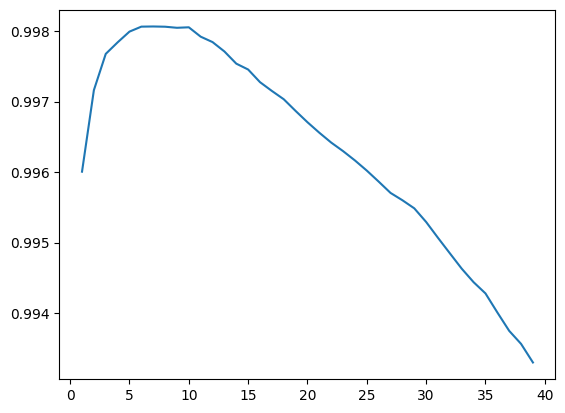

In [19]:
sns.lineplot(x = k_range, y = k_scores)

Our model gets the highest accuracy, when the K value is inbetween 5-10